# Import Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Loading the dataset

In [2]:
data=pd.read_csv("Loan_default.csv")

In [3]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# Explore Data Analysis and Data Cleaning

In [4]:
# create copy of data
df=data.copy()

In [5]:
# checking shape of data
df.shape

(255347, 18)

In [6]:
# finding na value from data
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [7]:
# find duplicate values from data
df.duplicated().sum()

0

In [8]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [9]:
df["NumCreditLines"].value_counts()


2    64130
3    63834
4    63829
1    63554
Name: NumCreditLines, dtype: int64

In [10]:
categorical_variables=['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose','NumCreditLines', 'HasCoSigner', 'Default']
numerical_variables=['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'LoanTerm', 'DTIRatio',]

In [11]:
for variable in categorical_variables:
    print(df[variable].value_counts())
    print("-"*50)

Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: Education, dtype: int64
--------------------------------------------------
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: EmploymentType, dtype: int64
--------------------------------------------------
Married     85302
Divorced    85033
Single      85012
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Yes    127677
No     127670
Name: HasMortgage, dtype: int64
--------------------------------------------------
Yes    127742
No     127605
Name: HasDependents, dtype: int64
--------------------------------------------------
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: LoanPurpose, dtype: int64
--------------------------------------------------
2    64130
3    63834
4    63829
1    63554
Name: NumCreditLines, dtype: int64
-------------------------------------

# Data Visualization

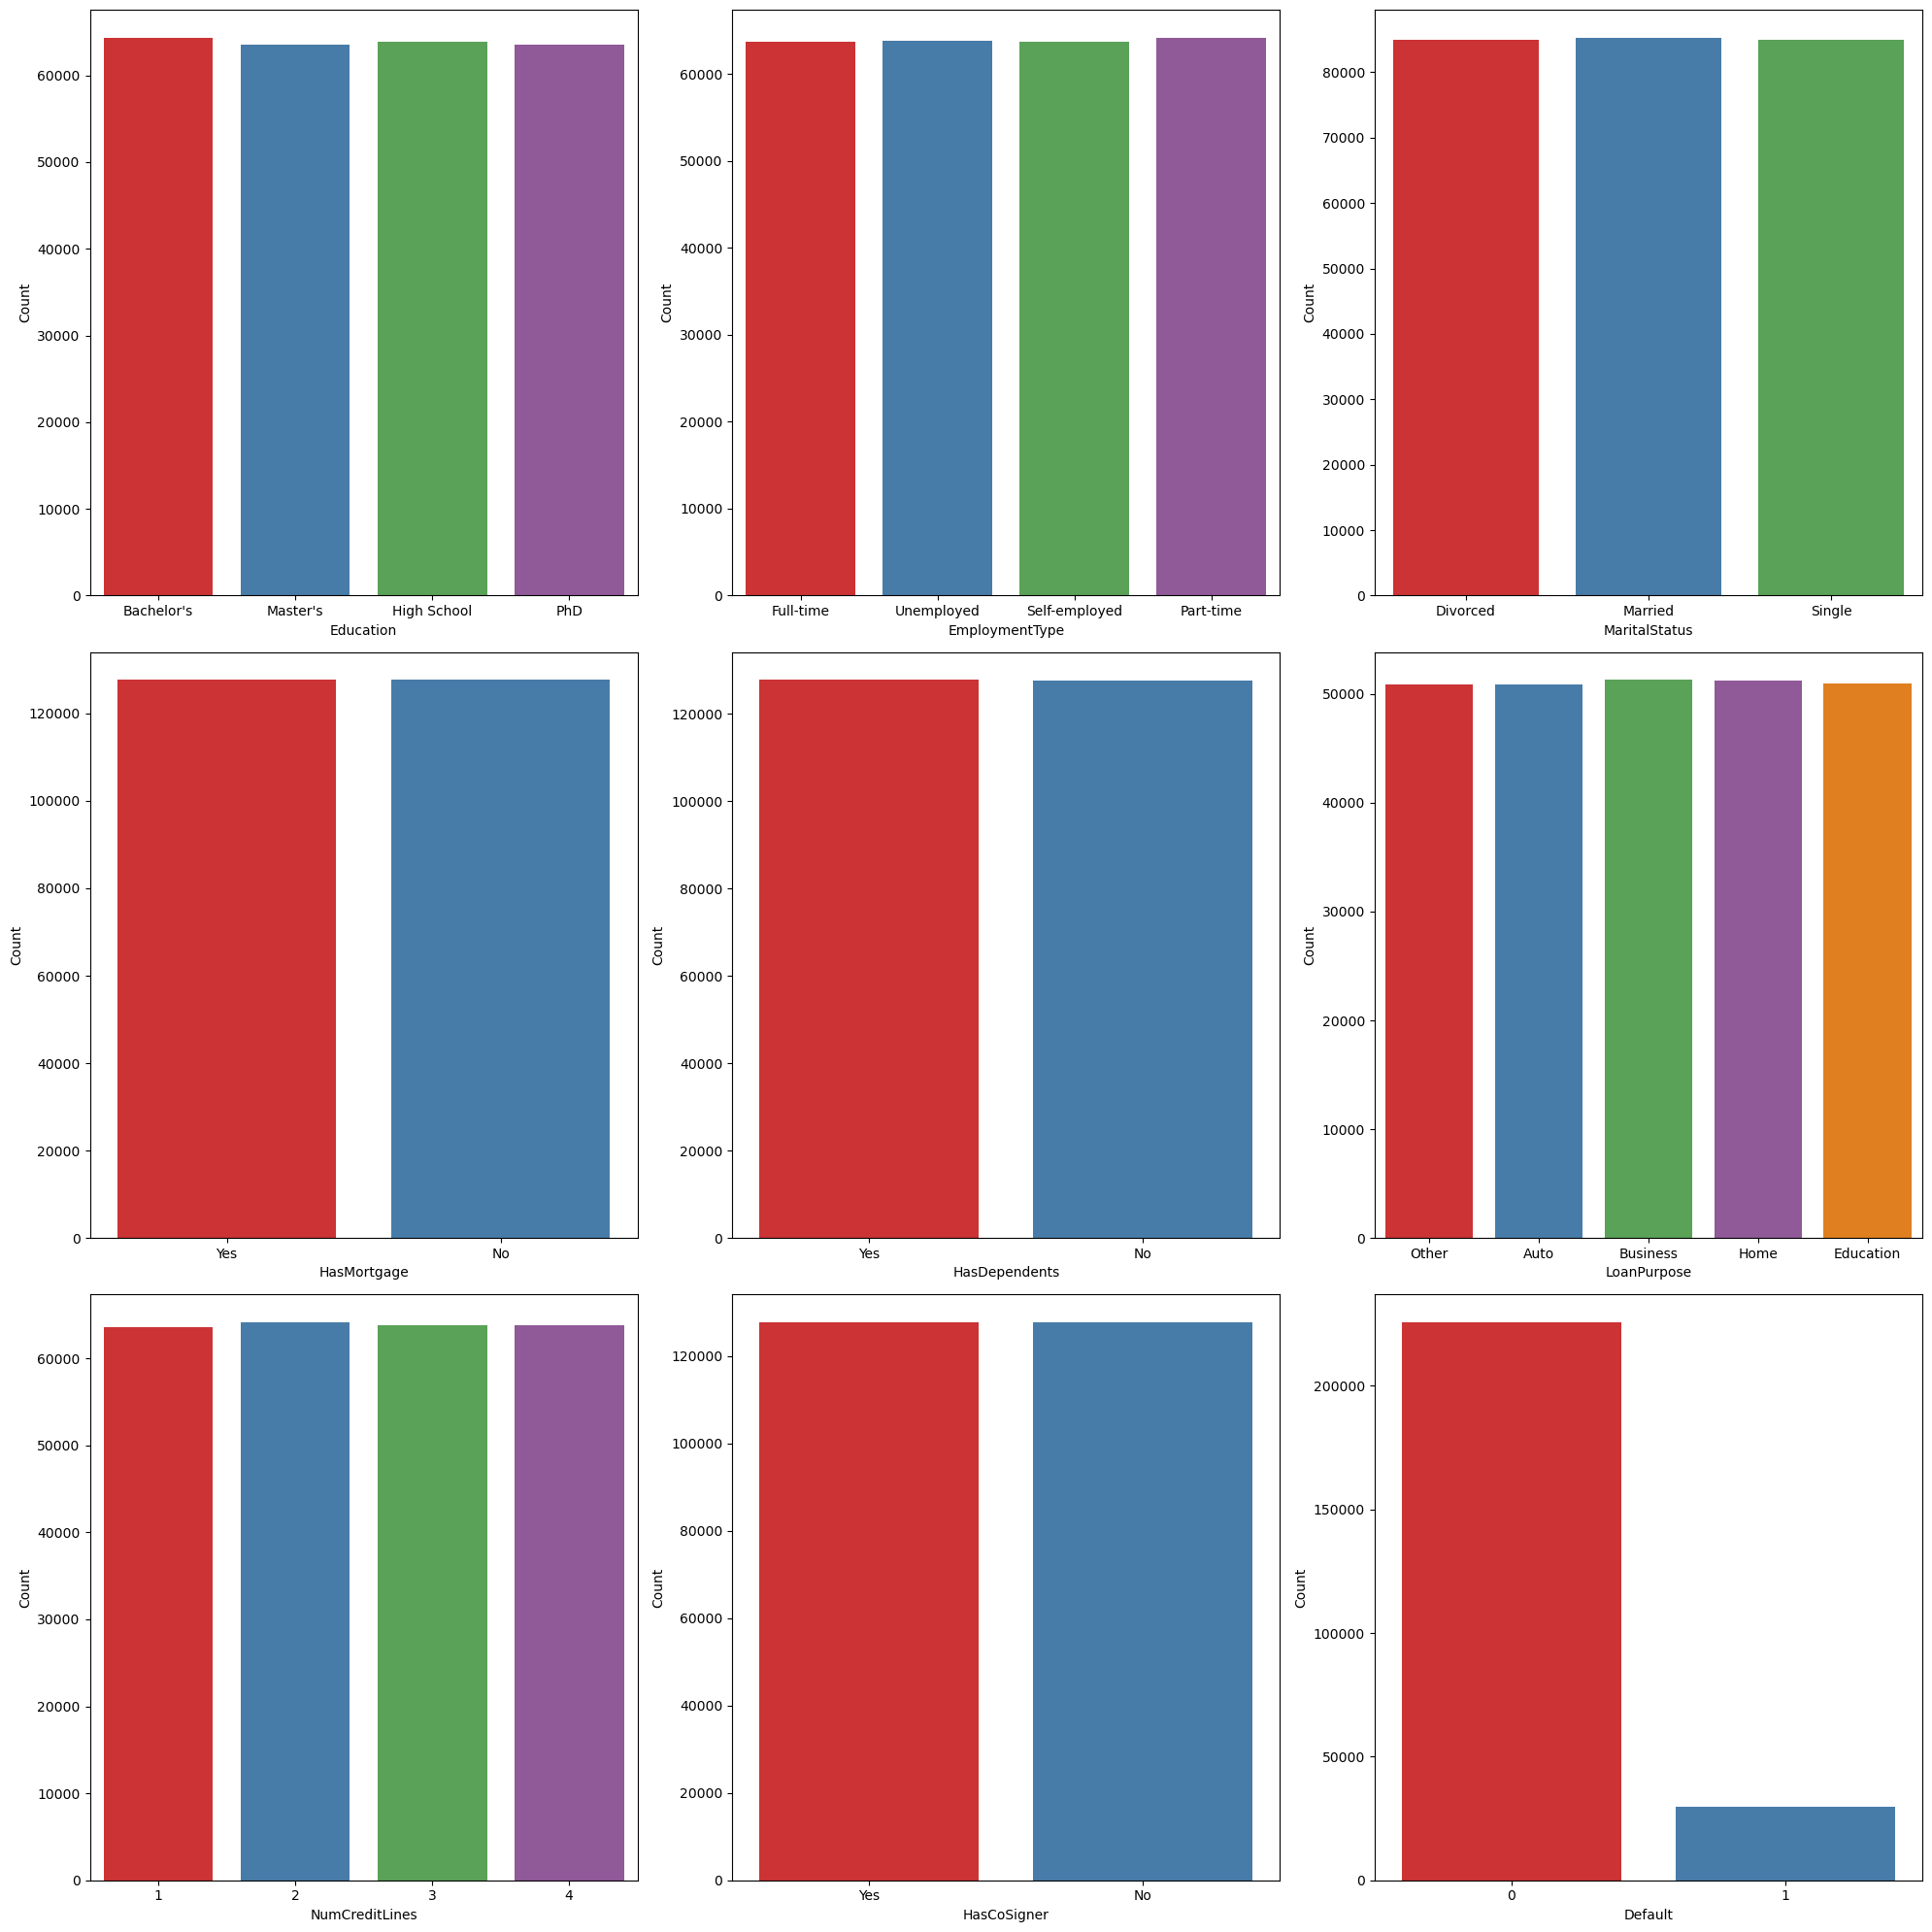

In [12]:
#Count of categories in each variable
plt.figure(figsize=(20, 20))
ind=1
for variable in categorical_variables:
    plt.subplot(3,3,ind)
    sns.countplot(x=df[variable],palette='Set1')
    plt.ylabel('Count')
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

In [13]:
#The categories of feature variables are almost equally distributed.
#In target variable,the classes are imbalanced.

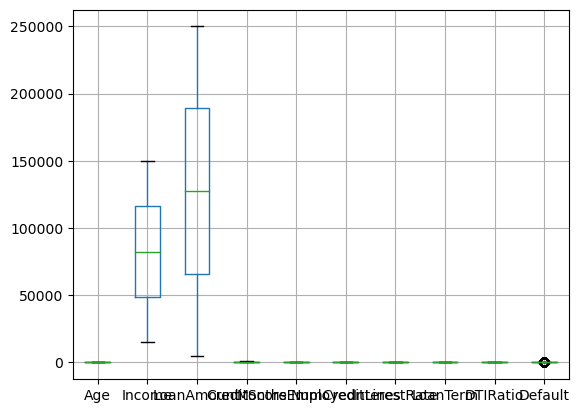

In [14]:
df.boxplot()
plt.show()

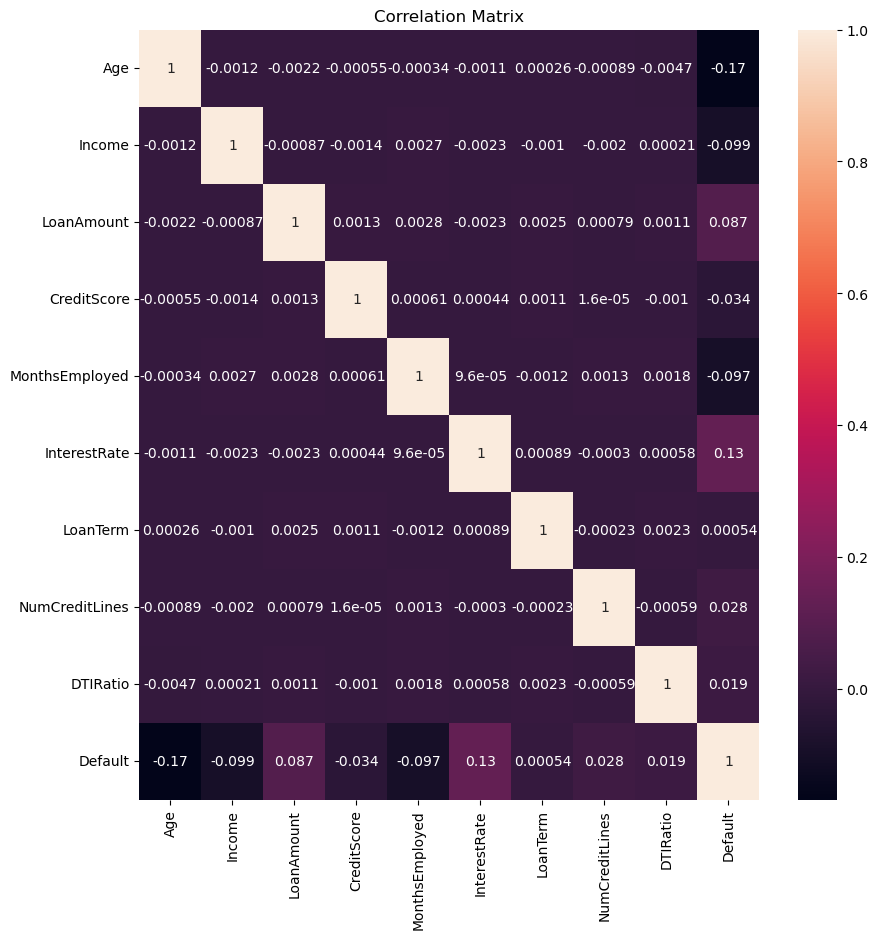

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'LoanTerm','NumCreditLines' ,'DTIRatio',"Default"]].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()


In [16]:
#Default and Interest rate are positively correlated (0.13).
#Default and Age are negatively correlated (-0.17).
#"Credit Score" is negatively correlated with Loan default.

In [17]:
#Import necessary libraries
from sklearn.preprocessing import OneHotEncoder

In [18]:
#Taking a copy of  dataframe
df_2=df.copy()

In [19]:
columns_to_encode = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
#---------------------------------------------------------------------------------------------
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df_2[columns_to_encode])
#--------------------------------------------------------------------------------------------
encoded_feature_names = encoder.get_feature_names_out(input_features=columns_to_encode)
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_feature_names)
#--------------------------------------------------------------------------------------------
#Dropping the categorical column
df_2.drop(columns=columns_to_encode, inplace=True)
#--------------------------------------------------------------------------------------------
#Concat the dataframes together
df_2 = pd.concat([df_2, encoded_df], axis=1)

In [20]:
print("Shape of the data after encoding :",df_2.shape)
df_2.head(2)

Shape of the data after encoding : (255347, 33)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [21]:
x=df_2.drop(columns=["LoanID","Default"])
y=df_2["Default"]

In [22]:
y.value_counts()

0    225694
1     29653
Name: Default, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=100)

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
smote=SMOTE()

In [27]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [28]:
y_train_smote.value_counts()

0    169350
1    169350
Name: Default, dtype: int64

In [29]:
# using linerar model in to import LogisticRegrassion 
from sklearn.linear_model import LogisticRegression

In [30]:
model=LogisticRegression()

In [31]:
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred=model.predict(x_test)
y_pred1=model.predict(x_train)

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
testing_accuracy=accuracy_score(y_test,y_pred)
testing_accuracy

0.8826385951720789

In [35]:
training_accuracy=accuracy_score(y_train,y_pred1)
training_accuracy

0.8842932483943398

In [36]:
#classification report of the Logistic Regression
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     56344
           1       1.00      0.00      0.00      7493

    accuracy                           0.88     63837
   macro avg       0.94      0.50      0.47     63837
weighted avg       0.90      0.88      0.83     63837



In [37]:
#confusion matrix of logistic regression
confusion_matrix(y_test,y_pred)

array([[56344,     0],
       [ 7492,     1]], dtype=int64)

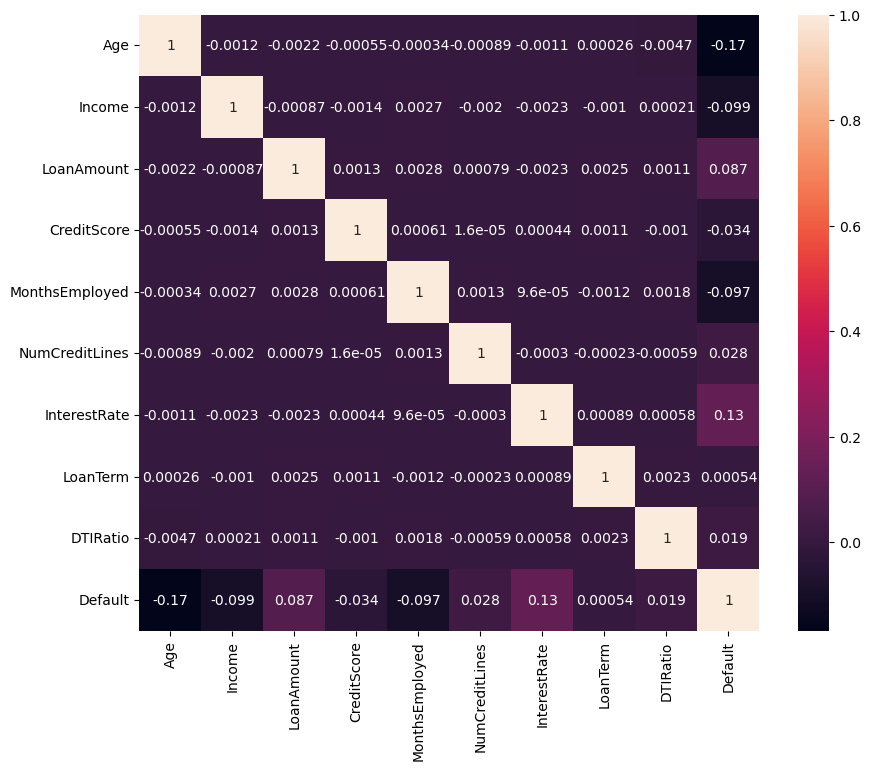

In [38]:
# visualize correlation matrix of numerical variables
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model=RandomForestClassifier(n_estimators=50,max_depth=2)

In [41]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=50)

In [42]:
y_pred2=model.predict(x_test)

In [43]:
testing_accuracy=accuracy_score(y_test,y_pred2)
testing_accuracy

0.8826229302755455

In [44]:
y_pred3=model.predict(x_train)

In [45]:
training_accuracy=accuracy_score(y_train,y_pred3)
training_accuracy

0.8842880267348964

In [52]:
#classification report of the Logistic Regression
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     56344
           1       0.00      0.00      0.00      7493

    accuracy                           0.88     63837
   macro avg       0.44      0.50      0.47     63837
weighted avg       0.78      0.88      0.83     63837



In [53]:
#confusion matrix of logistic regression
confusion_matrix(y_test,y_pred2)

array([[56344,     0],
       [ 7493,     0]], dtype=int64)

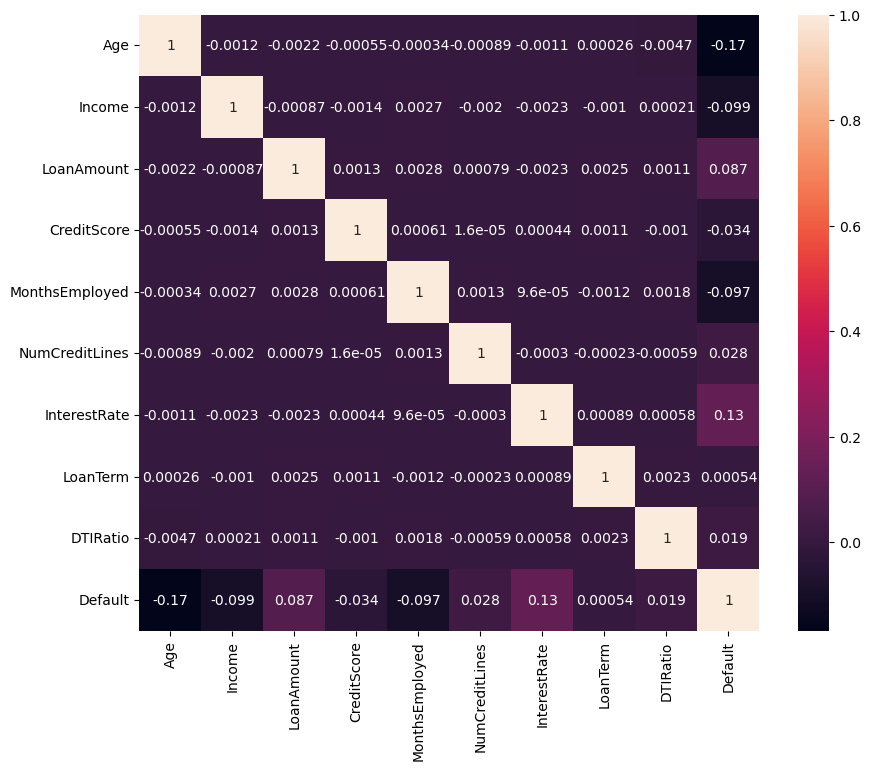

In [54]:
# visualize correlation matrix of numerical variables
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
predictions=clf.predict(x_test)

In [49]:
y_pred=model.predict(x_test)
y_pred1=model.predict(x_train)

In [50]:
testing_accuracy=accuracy_score(y_test,y_pred)
testing_accuracy

0.8826229302755455

In [51]:
training_accuracy=accuracy_score(y_train,y_pred1)
training_accuracy

0.8842880267348964

In [55]:
#classification report of the Logistic Regression
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     56344
           1       0.00      0.00      0.00      7493

    accuracy                           0.88     63837
   macro avg       0.44      0.50      0.47     63837
weighted avg       0.78      0.88      0.83     63837



In [56]:
#confusion matrix of logistic regression
confusion_matrix(y_test,y_pred)

array([[56344,     0],
       [ 7493,     0]], dtype=int64)

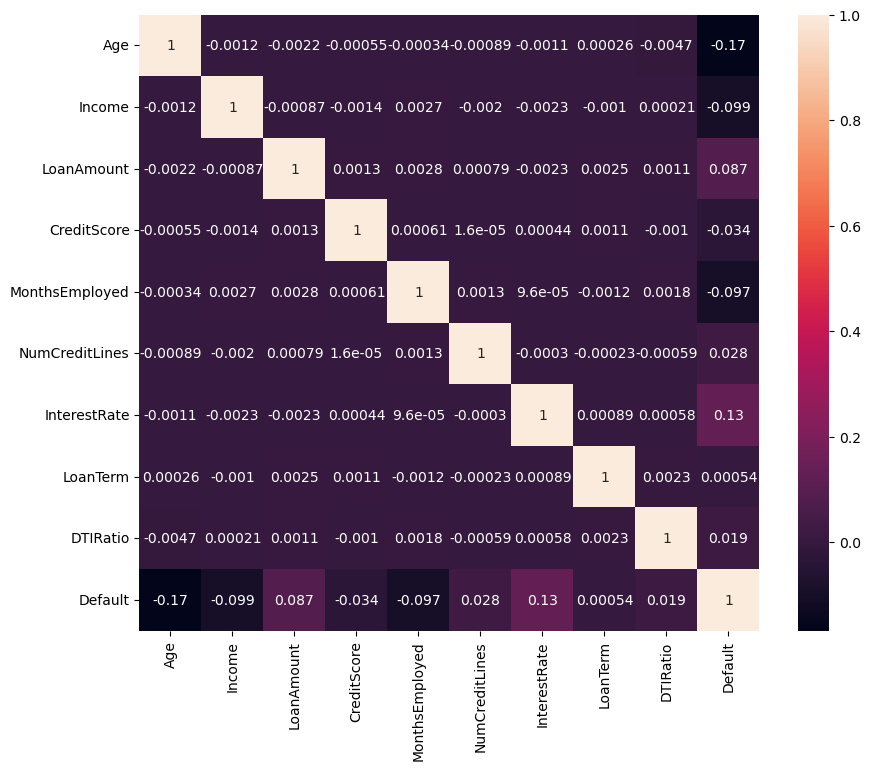

In [57]:
# visualize correlation matrix of numerical variables
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True)
plt.show()